#Data Preprocessing


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load datasets
credit_record = pd.read_csv('/content/credit_record.csv')
application_data = pd.read_csv('/content/application_record.csv')

In [3]:
# Preview the datasets
print(credit_record.head())
print(application_data.head())


        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4

In [4]:
# Merge datasets on ID
data = pd.merge(application_data, credit_record, on='ID')


In [5]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [6]:
# Data Cleaning
data.dropna(inplace=True)

In [7]:
# Feature Engineering
# Aggregate credit record to get the latest status
data_latest_status = credit_record.groupby('ID')['STATUS'].apply(lambda x: x.iloc[0]).reset_index()
data = pd.merge(data, data_latest_status, on='ID', how='left')

In [8]:
# Encode categorical variables
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                         'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL']

In [17]:
# Use LabelEncoder for simplicity
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

In [18]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


In [19]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS_x,STATUS_y
0,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,Security staff,2.0,0,C,C
1,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,Security staff,2.0,-1,C,C
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,Security staff,2.0,-2,C,C
3,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,Security staff,2.0,-3,C,C
4,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,Security staff,2.0,-4,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5150337,1,0,1,0,112500.0,4,4,3,4,...,-1193,1,0,0,0,Laborers,1.0,-9,0,0
537663,5150337,1,0,1,0,112500.0,4,4,3,4,...,-1193,1,0,0,0,Laborers,1.0,-10,2,0
537664,5150337,1,0,1,0,112500.0,4,4,3,4,...,-1193,1,0,0,0,Laborers,1.0,-11,1,0
537665,5150337,1,0,1,0,112500.0,4,4,3,4,...,-1193,1,0,0,0,Laborers,1.0,-12,0,0


In [23]:
X = data[numerical_features + categorical_features]
y = data['STATUS_x'] #Assuming the target variable is the latest status

In [24]:
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#Model Building

In [27]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [28]:
# Define models
logistic = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
xgboost = XGBClassifier(eval_metric='logloss')

In [29]:
# Combine models in a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logistic),
    ('rf', random_forest),
    ('xgb', xgboost)
], voting='soft')


In [30]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [31]:
# Predict on the test set
y_pred = voting_clf.predict(X_test)

In [32]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [33]:
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

Voting Classifier Accuracy: 0.6002


In [34]:

# Plot confusion matrix
import matplotlib.pyplot as plt
import itertools

In [35]:

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

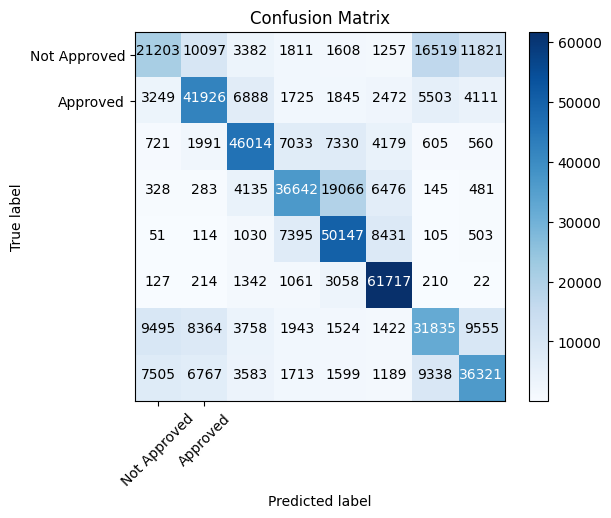

In [36]:
plot_confusion_matrix(cm, classes=['Not Approved', 'Approved'])
plt.show()

In [38]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

#Gradio Interface

In [39]:
import gradio as gr

def predict_approval(CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE,
                     NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE,
                     CNT_CHILDREN, AMT_INCOME_TOTAL):
    # Create a DataFrame from input
    input_data = pd.DataFrame([{
        'CODE_GENDER': CODE_GENDER,
        'FLAG_OWN_CAR': FLAG_OWN_CAR,
        'FLAG_OWN_REALTY': FLAG_OWN_REALTY,
        'NAME_INCOME_TYPE': NAME_INCOME_TYPE,
        'NAME_EDUCATION_TYPE': NAME_EDUCATION_TYPE,
        'NAME_FAMILY_STATUS': NAME_FAMILY_STATUS,
        'NAME_HOUSING_TYPE': NAME_HOUSING_TYPE,
        'CNT_CHILDREN': CNT_CHILDREN,
        'AMT_INCOME_TOTAL': AMT_INCOME_TOTAL
    }])

    # Preprocess input
    input_data_transformed = preprocessor.transform(input_data)

    # Predict using the trained model
    prediction = voting_clf.predict(input_data_transformed)
    return "Approved" if le.inverse_transform(prediction)[0] == '0' else "Not Approved"


In [41]:
# Define inputs
inputs = [
    gr.Dropdown(choices=['F', 'M'], label="Gender"),
    gr.Dropdown(choices=['Y', 'N'], label="Own Car"),
    gr.Dropdown(choices=['Y', 'N'], label="Own Realty"),
    gr.Dropdown(choices=['Working', 'Commercial associate', 'Other'], label="Income Type"),
    gr.Dropdown(choices=['Secondary / secondary special', 'Higher education', 'Other'], label="Education Level"),
    gr.Dropdown(choices=['Married', 'Single / not married', 'Other'], label="Family Status"),
    gr.Dropdown(choices=['House / apartment', 'With parents', 'Other'], label="Housing Type"),
    gr.Number(label="Number of Children"),
    gr.Number(label="Annual Income")
]

# Define output
output = gr.Textbox(label="Credit Card Approval Status")

In [42]:
# Create and launch the Gradio interface
gr.Interface(fn=predict_approval, inputs=inputs, outputs=output).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6d2f1f5a4e7b9e378e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [47]:
interface = gr.Interface(
    fn=predict_approval,
    inputs=[
        gr.Dropdown(['M', 'F'], label="Gender"),
        gr.Slider(minimum=18, maximum=100, step=1, label="Age"),
        gr.Textbox(label="Income"),
        gr.Slider(minimum=0, maximum=20, step=1, label="Number of Children"),
        gr.Checkbox(label="Own Car"),
        gr.Checkbox(label="Own Property")
    ],
    outputs="text",
    title="Credit Matrix",
    description="Enter details to predict if a credit card can be approved."
)

interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 9 arguments for function <function predict_approval at 0x7c9352066680>, received 6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1006: UserWarning: Expected at least 9 arguments for function <function predict_approval at 0x7c9352066680>, received 6.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://17d2cc4b76622e0f49.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
